# Exploring theoretical bounds on clustering purity and coverage

In [1]:
from itertools import combinations

In [2]:
def purity(clusters, classes):
    N = sum( len(clas) for clas in classes)
    return 1/N * sum(max(len(set(cluster) & set(clas)) for clas in classes) for cluster in clusters)

In [3]:
def coverage(clusters, classes):
    N = sum( len(clas) for clas in classes)
    return 1/N * sum(max(len(set(cluster) & set(clas)) for cluster in clusters) for clas in classes) 

In [4]:
clusters = [{1}, {2}, {3}]
classes = [{1, 2}, {3}]

In [5]:
print("Purity:", purity(clusters, classes))
print("Coverage:", coverage(clusters, classes))

Purity: 1
Coverage: 2/3


In [6]:
def partition(collection):
    if len(collection) == 1:
        yield [collection]
        return

    first = collection[0]
    for smaller in partition(collection[1:]):
        # insert `first` in each of the subpartition's subsets
        for n, subset in enumerate(smaller):
            yield smaller[:n] + [[first] + subset]  + smaller[n+1:]
        # put `first` in its own subset 
        yield [ [first]] + smaller


In [7]:
def epurity(classes):
    X = set.union(*classes)
    N = len(X)
    BX = bell_number(N)
    epur = 0
    for om in partition(list(X)):
        #print(om)
        pur = purity(om, classes)
        #print("Purity({}, {}) = {}".format(om, classes, purity(om, classes)))
        epur += pur
    return epur/BX

In [8]:
epurities = []
for n in range(11):
    epurities.append(epurity([{i} for i in range(n+1)]))
    print("Purity for {} is {} \n".format(n + 1, epurities[n]))

Purity for 1 is 1 

Purity for 2 is 3/4 

Purity for 3 is 2/3 

Purity for 4 is 37/60 

Purity for 5 is 151/260 

Purity for 6 is 337/609 

Purity for 7 is 3263/6139 

Purity for 8 is 5669/11040 

Purity for 9 is 94828/190323 

Purity for 10 is 112519/231950 

Purity for 11 is 3535027/7464270 



In [9]:
pl = list_plot(epurities) + list_plot([[0, .5],[11, .5]], plotjoined=True, color="red")

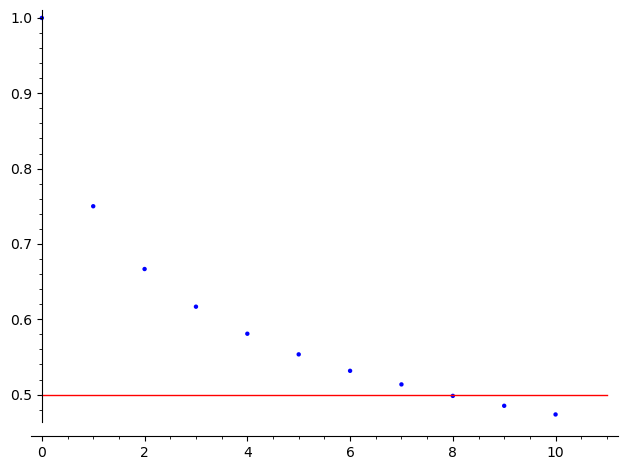

In [10]:
pl.show()